<a href="https://colab.research.google.com/github/Alok650/CNN--Model-for-Image-classification/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis - Titanic Survivors**

---



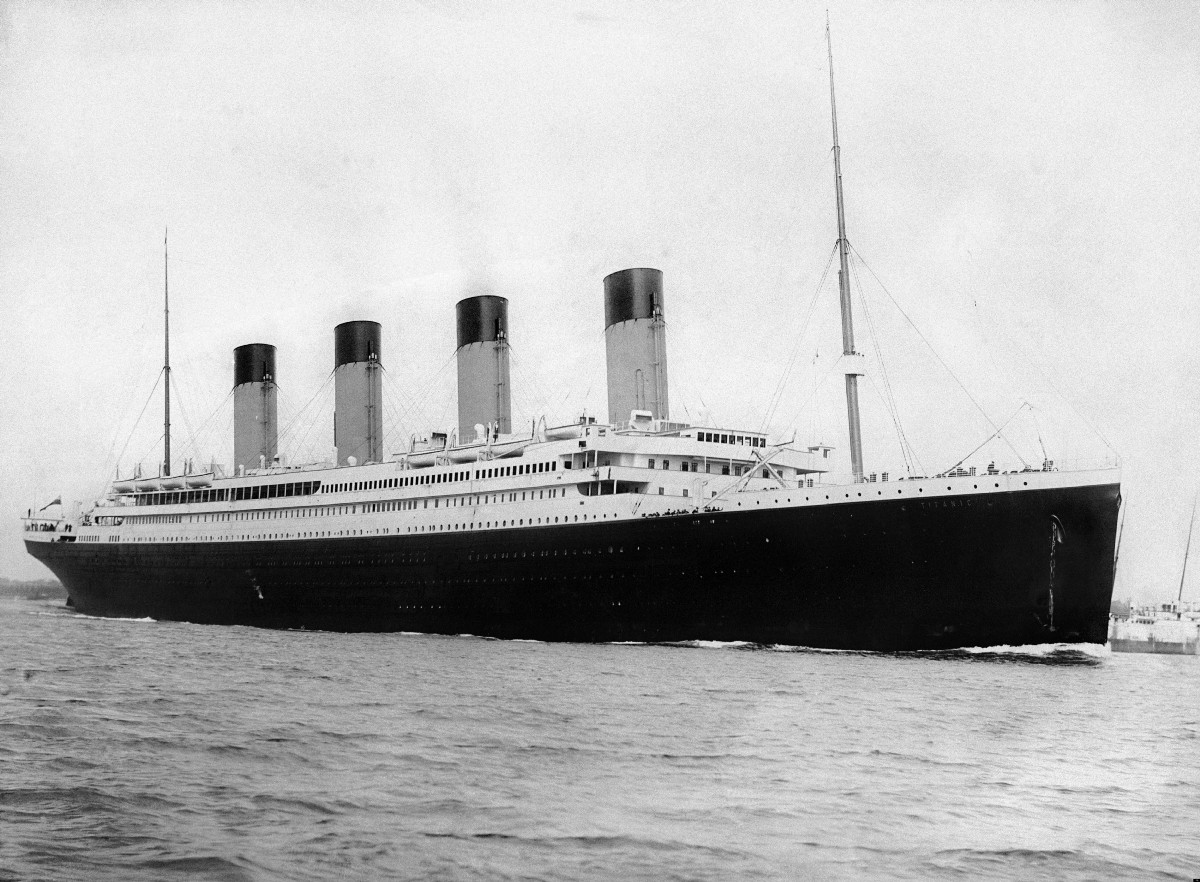


> # Titanic Machine Learning From Disaster.


The goal of this repository is to provide an example of an **analysis of the Titanic disaster** in Python **using a full complement of PyData utilities.** 

**Aim** : Predict if an individual will survive based on the features in the data like:

* Traveling Class (called pclass in the data)
* Sex
* Age
* Fare Price




### **This notebook includes**
**Data handling:**
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with the help of matplotlib.


Importing all the python libraries required for the analysis

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# Creating pandas data frame
df = pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Shape of the DataFrame
df.shape

(891, 12)



> # **DATA CLEANING**
Data cleaning is required for the model to have greater accuracy.





Checking the number of NaN values in every column using the isna function.

In [6]:
x = df.isnull().sum(axis = 0)
x

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now, let us remove the tuples which have NaN values.

In [7]:

df = df.drop(['Cabin'], axis=1)
df = df.dropna()
# df = df.dropna(axis = 0)


In order to check whether the NaN values have been deleted, let us run the isna function again.

In [8]:
x = df.isnull().sum(axis = 0)
x

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64



> # **Data visualization**



Visualizing the data using matplotlib

Text(0.5, 1.0, 'Passengers per boarding location')

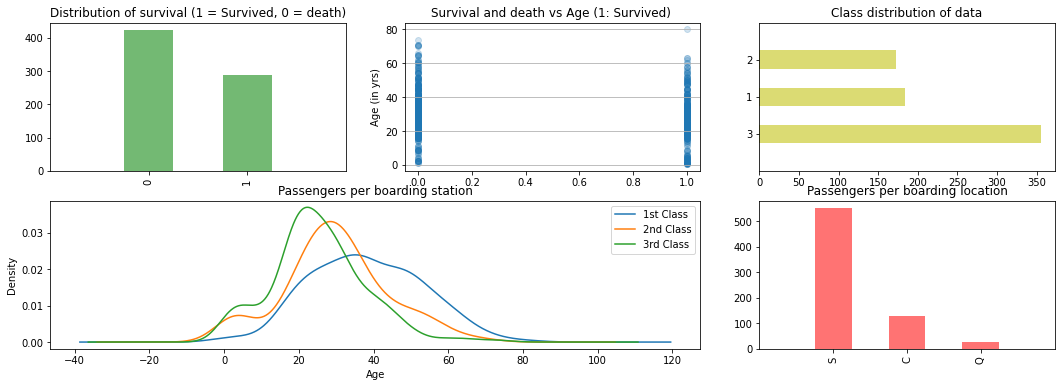

In [84]:
fig = plt.figure(figsize=(18,6))  
alpha=alpha_scatterplot = 0.2
alpha_bar_chart = 0.55


# PLOT 1: Survived vs death (1:0)
ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind = 'bar', alpha =alpha_bar_chart ,color ='g')
ax1.set_xlim(-1, 2)
plt.title("Distribution of survival (1 = Survived, 0 = death)")

# PLOT 2: Survival and death vs Age (1: Survived)
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha = alpha_scatterplot)
plt.ylabel("Age (in yrs)")
plt.grid(b = True, which ='major', axis = 'y')
plt.title("Survival and death vs Age (1: Survived) ")

# PLOT 3: Class distribution of the data
ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind = "barh", alpha = alpha_bar_chart, color = 'y')
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class distribution of data")

# PLOT 4: Age distribution within classes
plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind = 'kde')
df.Age[df.Pclass == 2].plot(kind = 'kde')
df.Age[df.Pclass == 3].plot(kind = 'kde')
plt.xlabel("Age")
plt.title("Age distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# PLOT 5: Passengers per boarding location
plt.title("Passengers per boarding station")
ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind= 'bar', alpha = alpha_bar_chart, color = 'r')
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location")


> ## **Prediction of death on the basis of gender**




(-1.0, 2.0)

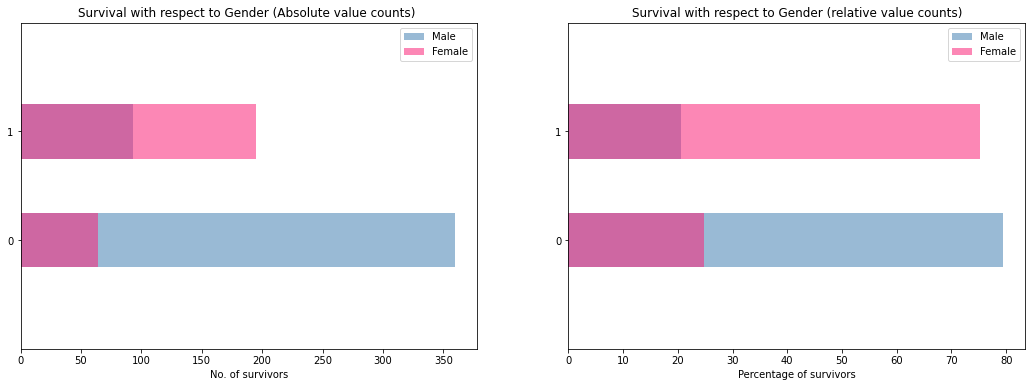

In [72]:
fig = plt.figure(figsize=(18,6))
#Declaration of variables
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

#PLOT 1: ABSOLUTE COUNTS OF SURVIVORS WRT GENDER.
ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male',color='steelblue', alpha=0.55)
df_female.plot(kind='barh', color='#FA2479',label='Female', alpha=0.55)
plt.title("Survival with respect to Gender (Absolute value counts) "); plt.legend(loc='best')
plt.xlabel("No. of survivors")
ax1.set_ylim(-1, 2) 

#PLOT 2: RELATIVE COUNTS OF SURVIVORS WRT GENDER.
#To display the relative counts of survival by gender, divide variable by the sum.
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())*100).plot(kind='barh',label='Male',color= 'steelblue', alpha=0.55)  
(df_female/float(df_female.sum())*100).plot(kind='barh', color='#FA2479',label='Female', alpha=0.55)
plt.xlabel("Percentage of survivors")
plt.title("Survival with respect to Gender (relative value counts)"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

> ## **Prediction of death on the basis of gender and class**

In [92]:
#figure size
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

#PLOT 1: PLOT OF SURVIVAL OF LOW CLASS FEMALE.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Survival wrt. gender and class"); plt.legend(loc='best')

#PLOT 2: PLOT OF SURVIVAL OF LOW CLASS FEMALE.
ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

#PLOT 3: PLOT OF SURVIVAL OF LOW CLASS MALE.
ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

#PLOT 4: PLOT OF SURVIVAL OF HIGH CLASS MALE.
ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')


## **Observation**
*   It’s clear that although more men died and survived in raw value counts (from graph-1), females had a greater survival rate proportionally (from graph-2).
*   More passengers, who belonged to lower class died compared to the passengers from higher class.
*   Death and survival of passengers wrt was well-distributed. However, almost all passengers above the age of 65 died.
*   Class 3 (referred to as pclass in dataset) had greatest death count, whereas class 1 had the least.



